[Reference](https://medium.com/@devangdayal/data-viz-dashboard-using-streamlit-d605e1d74766)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/devangdayal/Streamlit-AppleStock/main/Apple_stock_history.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.100453,0.100890,0.100453,0.100453,469033600,0.0,0.0
1,1980-12-15,0.095649,0.095649,0.095213,0.095213,175884800,0.0,0.0
2,1980-12-16,0.088661,0.088661,0.088224,0.088224,105728000,0.0,0.0
3,1980-12-17,0.090408,0.090845,0.090408,0.090408,86441600,0.0,0.0
4,1980-12-18,0.093029,0.093466,0.093029,0.093029,73449600,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10353 non-null  object 
 1   Open          10353 non-null  float64
 2   High          10353 non-null  float64
 3   Low           10353 non-null  float64
 4   Close         10353 non-null  float64
 5   Volume        10353 non-null  int64  
 6   Dividends     10353 non-null  float64
 7   Stock Splits  10353 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 647.2+ KB


In [24]:
# We need to change the Data column from Object type to Date & Time type for better usability

data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.reset_index(drop=True,inplace=True)
data.set_index('Date',inplace=True)
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Market Cap
Date,,,,,,,,
1980-12-12,0.100453,0.100890,0.100453,0.100453,469033600,0.0,0.0,4.711604e+07
1980-12-15,0.095649,0.095649,0.095213,0.095213,175884800,0.0,0.0,1.682329e+07
1980-12-16,0.088661,0.088661,0.088224,0.088224,105728000,0.0,0.0,9.373957e+06
1980-12-17,0.090408,0.090845,0.090408,0.090408,86441600,0.0,0.0,7.815007e+06
1980-12-18,0.093029,0.093466,0.093029,0.093029,73449600,0.0,0.0,6.832949e+06
...,...,...,...,...,...,...,...,...
2021-12-28,180.160004,181.330002,178.529999,179.289993,79144300,0.0,0.0,1.425864e+10
2021-12-29,179.330002,180.630005,178.139999,179.380005,62348900,0.0,0.0,1.118103e+10
2021-12-30,179.470001,180.570007,178.089996,178.199997,59773000,0.0,0.0,1.072746e+10


In [25]:
# Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10353 entries, 1980-12-12 to 2022-01-03
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10353 non-null  float64
 1   High          10353 non-null  float64
 2   Low           10353 non-null  float64
 3   Close         10353 non-null  float64
 4   Volume        10353 non-null  int64  
 5   Dividends     10353 non-null  float64
 6   Stock Splits  10353 non-null  float64
 7   Market Cap    10353 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 727.9 KB


In [26]:
# Basic Stats information of Data
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Market Cap
count,10353.000000,10353.000000,10353.000000,10353.000000,1.035300e+04,10353.000000,10353.000000,1.035300e+04
mean,12.527827,12.662576,12.395203,12.534635,3.334582e+08,0.000572,0.001642,2.404529e+09
std,27.773063,28.085067,27.476340,27.797191,3.397992e+08,0.009675,0.086229,3.957508e+09
min,0.038871,0.038871,0.038434,0.038434,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.234073,0.238832,0.228249,0.233785,1.259888e+08,0.000000,0.000000,3.973901e+07
50%,0.382599,0.388494,0.375505,0.382565,2.219952e+08,0.000000,0.000000,1.367731e+08
75%,11.813880,11.905433,11.657717,11.777137,4.150720e+08,0.000000,0.000000,3.849020e+09
max,181.119995,182.880005,178.529999,182.009995,7.421641e+09,0.220000,7.000000,4.417231e+10


In [27]:
# Data Shape 
data.shape

(10353, 8)

In [28]:
# Attribute names of the Dataset
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Market Cap'],
      dtype='object')

In [29]:
# Unique Data Observation of each Column
data.nunique()

Open             9733
High             9564
Low              9375
Close            7354
Volume           9791
Dividends          16
Stock Splits        4
Market Cap      10353
dtype: int64

In [30]:
# Checking for the Null values in the Dataset
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Market Cap      0
dtype: int64

In [31]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Market Cap
Date,,,,,,,,
1980-12-12,0.100453,0.100890,0.100453,0.100453,469033600,0.0,0.0,4.711604e+07
1980-12-15,0.095649,0.095649,0.095213,0.095213,175884800,0.0,0.0,1.682329e+07
1980-12-16,0.088661,0.088661,0.088224,0.088224,105728000,0.0,0.0,9.373957e+06
1980-12-17,0.090408,0.090845,0.090408,0.090408,86441600,0.0,0.0,7.815007e+06
1980-12-18,0.093029,0.093466,0.093029,0.093029,73449600,0.0,0.0,6.832949e+06


In [32]:
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Market Cap
Date,,,,,,,,
2021-12-28,180.160004,181.330002,178.529999,179.289993,79144300,0.0,0.0,1.425864e+10
2021-12-29,179.330002,180.630005,178.139999,179.380005,62348900,0.0,0.0,1.118103e+10
2021-12-30,179.470001,180.570007,178.089996,178.199997,59773000,0.0,0.0,1.072746e+10
2021-12-31,178.089996,179.229996,177.259995,177.570007,64025500,0.0,0.0,1.140230e+10
2022-01-03,177.830002,182.880005,177.710007,182.009995,104487900,0.0,0.0,1.858108e+10


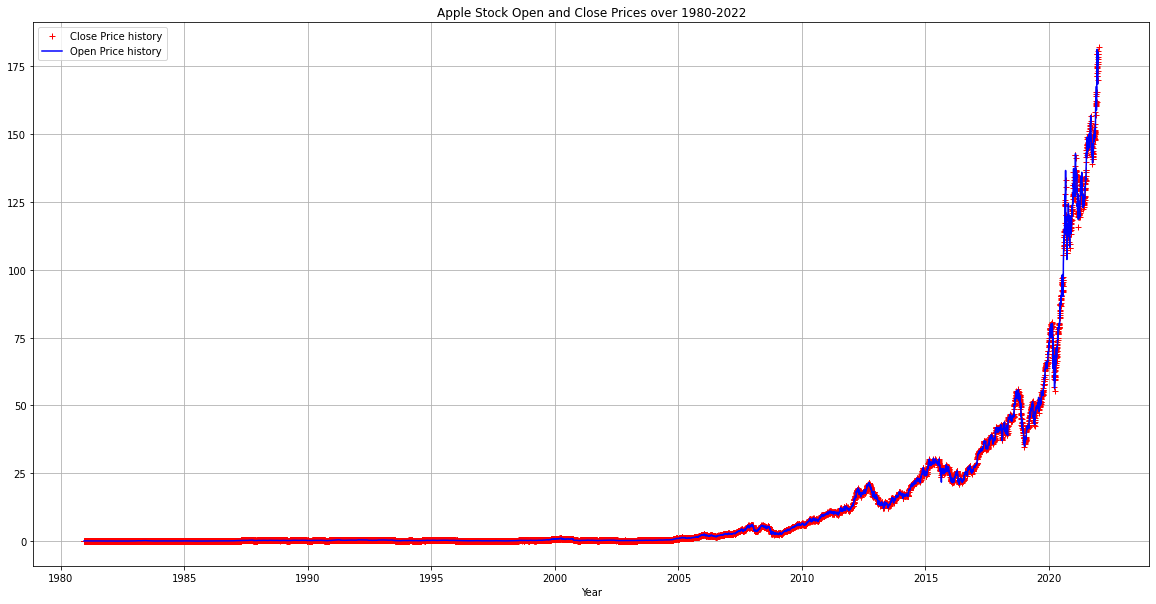

In [33]:
#  Plotting the Apple Stock Open and Close Prices over 1980-2022

plt.figure(figsize=(20,10))
plt.plot(data['Close'],'+r', label='Close Price history')
plt.plot(data['Open'], '-b', label='Open Price history')
plt.legend()
plt.grid()
plt.xlabel("Year")
plt.title("Apple Stock Open and Close Prices over 1980-2022")
plt.show()

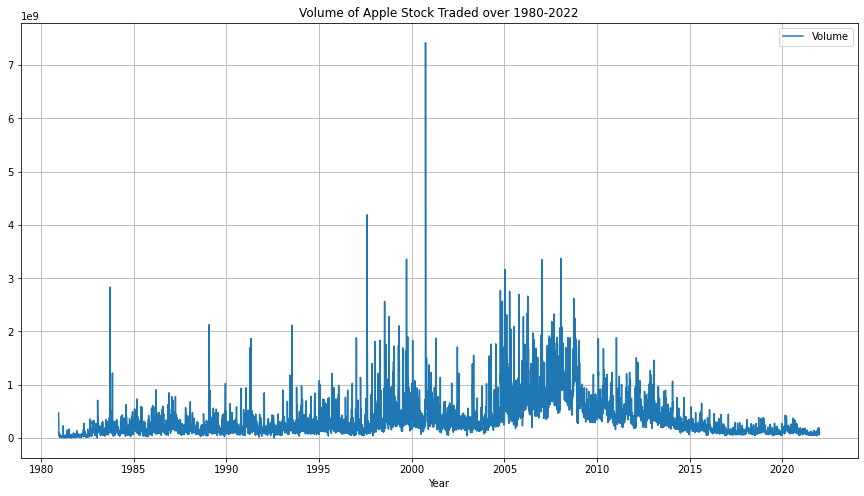

In [34]:
# Plotting Volumes of Stocks 

plt.figure(figsize=(15,8))
plt.plot(data['Volume'], label='Volume',)
plt.legend()
plt.grid()
plt.xlabel("Year")
plt.title("Volume of Apple Stock Traded over 1980-2022")
plt.show()

In [35]:
# We can also calculate Market cap
data['Market Cap'] = data['Open'] * data['Volume']
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Market Cap
Date,,,,,,,,
1980-12-12,0.100453,0.100890,0.100453,0.100453,469033600,0.0,0.0,4.711604e+07
1980-12-15,0.095649,0.095649,0.095213,0.095213,175884800,0.0,0.0,1.682329e+07
1980-12-16,0.088661,0.088661,0.088224,0.088224,105728000,0.0,0.0,9.373957e+06
1980-12-17,0.090408,0.090845,0.090408,0.090408,86441600,0.0,0.0,7.815007e+06
1980-12-18,0.093029,0.093466,0.093029,0.093029,73449600,0.0,0.0,6.832949e+06
...,...,...,...,...,...,...,...,...
2021-12-28,180.160004,181.330002,178.529999,179.289993,79144300,0.0,0.0,1.425864e+10
2021-12-29,179.330002,180.630005,178.139999,179.380005,62348900,0.0,0.0,1.118103e+10
2021-12-30,179.470001,180.570007,178.089996,178.199997,59773000,0.0,0.0,1.072746e+10


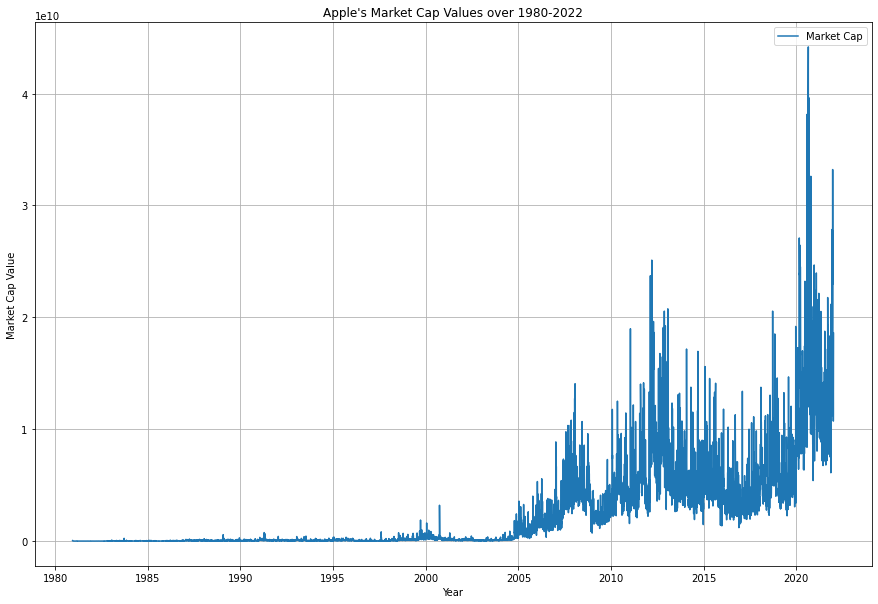

In [36]:
# Plotting Market Cap Value of Apple Stock Over the Years

plt.figure(figsize=(15,10))
plt.plot(data['Market Cap'], label='Market Cap')
plt.legend()
plt.grid()
plt.ylabel('Market Cap Value')
plt.xlabel("Year")
plt.title("Apple's Market Cap Values over 1980-2022")
plt.show()

In [38]:
# For better analysis and getting more insight on trends and pattern of Apple Stock 
# We will be creating a SpreadSheet/Pivot Table to map Stock Opening & Closing Value change in each month 
pivot = pd.pivot_table(data, values=['Open','Close'], index=data.index.month, columns=data.index.year, aggfunc='mean')
pivot

Close                                                              \
Date      1980      1981      1982      1983      1984      1985      1986   
Date                                                                         
1          NaN  0.110603  0.069357  0.117529  0.095795  0.102221  0.080641   
2          NaN  0.092270  0.066088  0.156404  0.088093  0.098155  0.085857   
3          NaN  0.086775  0.057975  0.151725  0.091560  0.079468  0.091609   
4          NaN  0.095129  0.056924  0.159874  0.092832  0.074872  0.100493   
5          NaN  0.101305  0.051908  0.191195  0.108474  0.068690  0.122208   
6          NaN  0.107283  0.046256  0.194654  0.099476  0.057302  0.126409   
7          NaN  0.085167  0.044861  0.152165  0.090658  0.060054  0.119036   
8          NaN  0.078137  0.050644  0.116652  0.097491  0.052748  0.121251   
9          NaN  0.063350  0.063537  0.105487  0.093213  0.054962  0.119983   
10         NaN  0.064878  0.081257  0.074269  0.086686  0.059190  0.117164   
11         NaN  0.065142  0.105466  0.072189  0.084689  0.068003  0.127739   
12    0.106367  0.070456  0.108315  0.080051  0.094164  0.073208  0.146313   

                                    ...       Open                        \
Date      1987      1988      1989  ...       2013       2014       2015   
Date                                ...                                    
1     0.170272  0.294002  0.291742  ...  15.448628  17.040667  25.161109   
2     0.210976  0.289450  0.265447  ...  14.229509  16.733159  28.393129   
3     0.231381  0.309853  0.247773  ...  13.734246  16.999066  28.737649   
4     0.252257  0.285390  0.272639  ...  13.043056  17.205776  28.980535   
5     0.272188  0.283230  0.315600  ...  13.937043  19.237922  29.344861   
6     0.280625  0.314563  0.323012  ...  13.385717  20.611373  29.210753   
7     0.288260  0.314202  0.284892  ...  13.394953  21.467209  28.625873   
8     0.343703  0.297476  0.304423  ...  15.218606  22.099211  25.985025   
9     0.372997  0.293833  0.320037  ...  15.199772  22.675798  25.904422   
10    0.321879  0.280546  0.334319  ...  15.872787  22.906099  25.884288   
11    0.255764  0.266814  0.319615  ...  16.554923  25.539380  27.195741   
12    0.264282  0.282762  0.271832  ...  17.754691  25.513708  25.850376   

                                                                          \
Date       2016       2017       2018       2019        2020        2021   
Date                                                                       
1     22.722068  28.025137  41.609330  37.279934   76.654114  132.285542   
2     22.130715  31.447212  40.109820  41.727493   76.585410  131.367468   
3     24.028179  33.173296  42.025230  44.658095   64.465733  121.520680   
4     24.715324  33.803812  40.757153  48.714547   67.117167  131.061176   
5     22.092754  36.011294  44.514852  46.656122   76.428898  126.616113   
6     22.491340  35.173826  45.482628  47.139964   85.306341  129.107402   
7     22.925005  35.145703  45.838282  50.170816   94.499162  144.143827   
8     25.141787  37.824394  51.337171  50.362026  116.015816  147.595622   
9     25.910668  37.669180  53.770876  53.474629  115.169133  148.784759   
10    27.097760  37.489756  53.497330  57.699516  115.779357  144.760158   
11    25.891765  41.194064  46.511692  64.428288  115.994594  153.562198   
12    26.825523  41.059525  40.103580  67.840156  126.371401  173.155454   

                  
Date        2022  
Date              
1     177.830002  
2            NaN  
3            NaN  
4            NaN  
5            NaN  
6            NaN  
7            NaN  
8            NaN  
9            NaN  
10           NaN  
11           NaN  
12           NaN  

[12 rows x 86 columns]

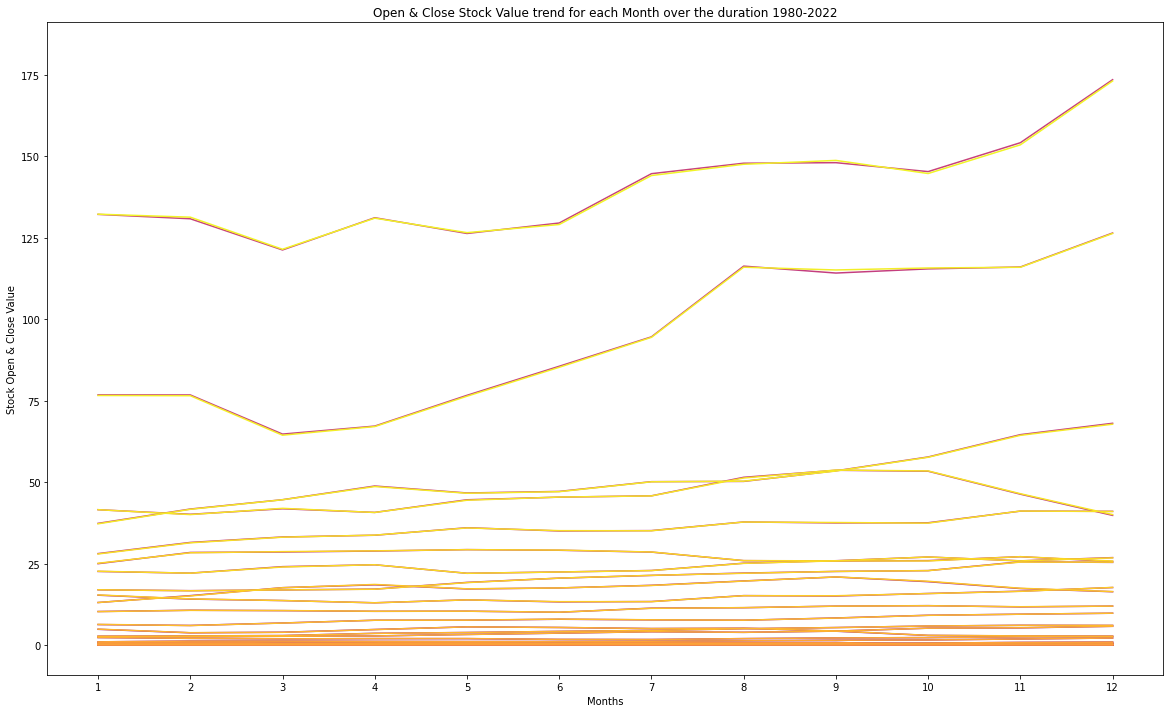

In [39]:
# Lets see trend of each Month of the Year 
pivot.plot(figsize=(20,12), 
           colormap='plasma')
plt.title('Open & Close Stock Value trend for each Month over the duration 1980-2022')
plt.xlabel('Months')
plt.ylabel('Stock Open & Close Value')

plt.xticks([x for x in range(1,13)])
# For Plot Info Yellow Line represent Open Values
# Blue-Violet represent Close Values
plt.legend().remove() # Enable the Legend and See some fun Legends :)
plt.show()

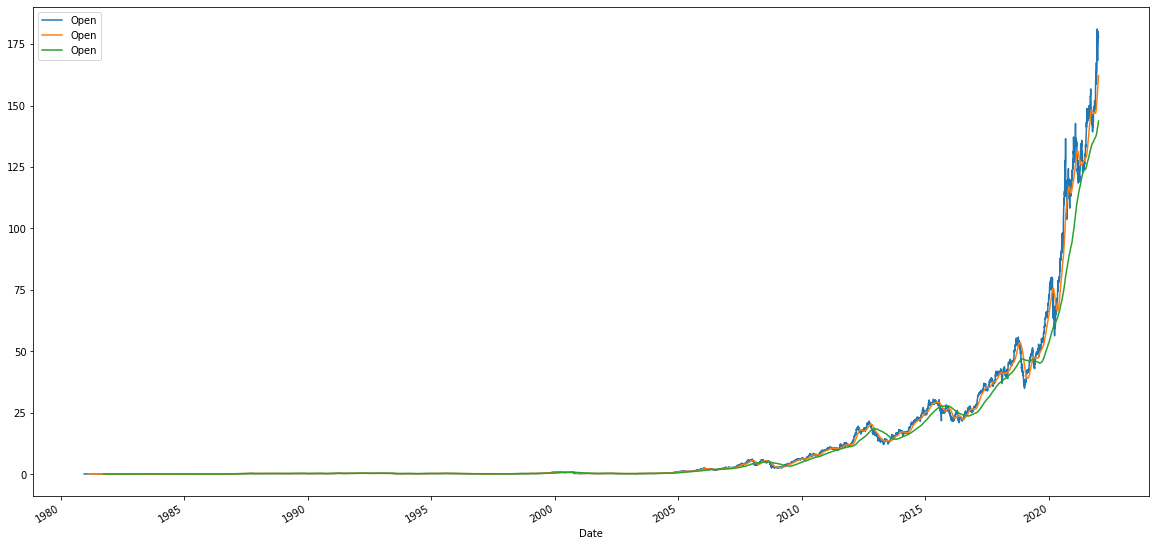

In [40]:
# Plotting Moving Mean Average of Open Value of Stock for 50-day 200-day 

data_MA50 = data['Open'].rolling(50).mean()
data_MA200 = data['Open'].rolling(200).mean()
data['Open'].plot(figsize = (20,10))
data_MA50.plot()
data_MA200.plot()
plt.legend()

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10353 entries, 1980-12-12 to 2022-01-03
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10353 non-null  float64
 1   High          10353 non-null  float64
 2   Low           10353 non-null  float64
 3   Close         10353 non-null  float64
 4   Volume        10353 non-null  int64  
 5   Dividends     10353 non-null  float64
 6   Stock Splits  10353 non-null  float64
 7   Market Cap    10353 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 727.9 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27db871e10>,
      dtype=object)

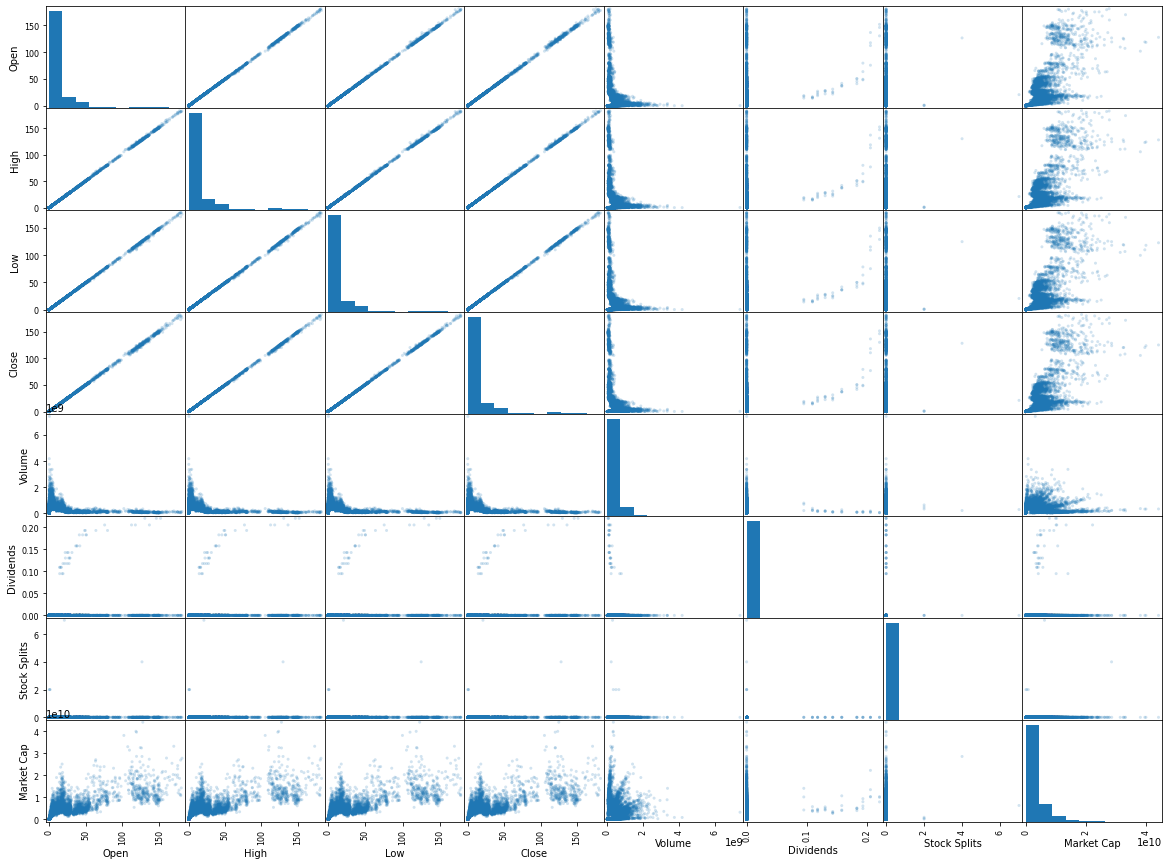

In [42]:
# Scatter Matrix of Dataset
pd.plotting.scatter_matrix(data,
                           alpha=0.2,
                           figsize=(20,15))

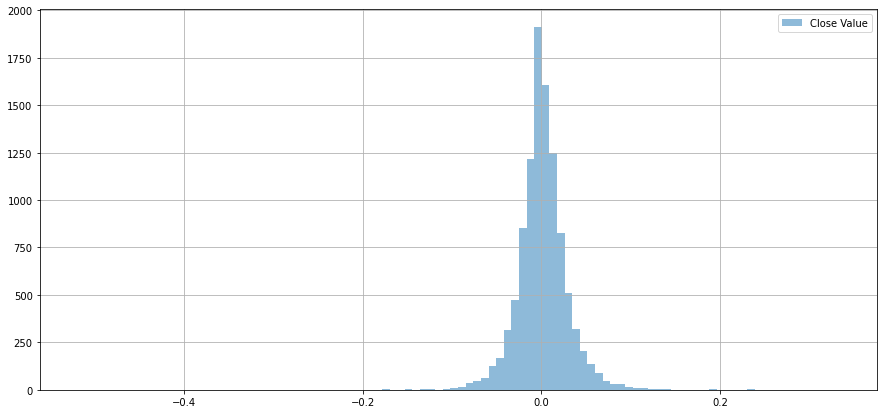

In [43]:
# Volatility
# Percentage Increase of each Stock.
data['returns'] = (data['Close']/data['Close'].shift(1)) -1
data['returns'].hist(bins = 100, label = 'Close Value', alpha = 0.5, figsize = (15,7))
plt.legend()

In [44]:
!pip install streamlit
# !streamlit hello

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.1 MB 4.4 MB/s 
     |████████████████████████████████| 232 kB 54.8 MB/s 
     |████████████████████████████████| 164 kB 48.0 MB/s 
     |████████████████████████████████| 181 kB 58.4 MB/s 
     |████████████████████████████████| 77 kB 3.0 MB/s 
     |████████████████████████████████| 111 kB 65.0 MB/s 
     |████████████████████████████████| 4.3 MB 5.7 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 133 kB 36.9 MB/s 
     |████████████████████████████████| 428 kB 41.3 MB/s 
     |████████████████████████████████| 793 kB 29.0 MB/s 
     |████████████████████████████████| 132 kB 52.5 MB/s 
     |████████████████████████████████| 381 kB 43.5 MB/s 
     |████████████████████████████████| 51 kB 6.0 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=ba3f628966b0

2022-06-09 02:55:13.968 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  Welcome to Streamlit. Check out our demo in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.238.169.235:8501

  Ready to create your own Python apps super quickly?
  Head over to https://docs.streamlit.io

  May you create awesome apps!



exit
exit()
  Stopping...
^C


In [45]:
#streamlit run your_script.py [-- script args]

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import datetime

# Specifying it on the First Line of your code is advisable 
st.set_page_config(page_title='EDA - Apple Stock Prices',
                   page_icon='https://cdn.freebiesupply.com/images/large/2x/apple-logo-transparent.png',
                   layout="wide")  


"""
[![Star](https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white)](https://gitHub.com/devangdayal/Medium)
&nbsp[![Follow](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/devangdayal)
&nbsp[![Follow](https://img.shields.io/twitter/follow/devangdayal?style=social)](https://www.twitter.com/devangdayal)
# Apple Stock Price Visualisation WebApp
    """
st.markdown('---')
# Sidebar Configuration
st.sidebar.image('https://cdn.freebiesupply.com/images/large/2x/apple-logo-transparent.png', width=200)
st.sidebar.markdown('# Apple Stock Price Visualiser')
st.sidebar.markdown('Stock Data varies from 1980-2022')
st.sidebar.markdown('You can visualise the Apple \'s Stock Prices Trend and Pattern over the given span.') 


st.sidebar.markdown('---')
st.sidebar.write('Developed by Devang Dayal')
st.sidebar.write('Contact here @[devangdayal](https://github.com/devangdayal)')

# Dataset Importing and Index Processing

@st.cache(allow_output_mutation=True) # We include this so as to decrease the loading time of the Web App
def data_ret():
    data = pd.read_csv('Apple_stock_history.csv')
    data['Date'] = pd.to_datetime(data['Date'],format='%Y/%m/%d')
    data.reset_index(drop=True,inplace=True)
    data.set_index('Date',inplace=True)
    return data

df = data_ret()

# Let us display the Raw Data into our Web App
st.subheader('Glimpse of Dataset')
st.dataframe(df.head())

# Let us display the basic statistical information of our dataset
st.subheader('Statistical Info of the Dataset')
st.write(df.describe())


st.markdown("** You can select specific time duration **")
df_sliced = df

col1, col2 = st.columns(2)

with col1:
    st.write('Select the Initial Date')
    init_dt = st.date_input('Initial Date',min_value= datetime.date(1980, 12, 12),max_value=datetime.date(2022,1,3),value=datetime.date(1980,12,12))

with col2:    
    st.write('Select the Final Date')
    final_dt = st.date_input('Final Date',min_value=datetime.date(1980,12,12),max_value=datetime.date(2022,1,3),value=datetime.date(2022,1,3))

if(init_dt != None or final_dt != None):
    if(init_dt <final_dt):
        df_sliced = df[init_dt:final_dt]
    else:
        st.warning("Entered the Date in Correct Order")
        
st.subheader("Apple Stock Price Open & Close Value (1980-2022)")
df_open_close = df_sliced[['Open','Close']]


# Select the Chart type you want to visualise
option_oc = st.selectbox('What Visual Chart You want to Visualise ?',('Line Chart','Line Area Chart','Bar Chart'))


if option_oc == 'Line Chart':
    st.line_chart(df_open_close)
elif option_oc == 'Line Area Chart':
    st.area_chart(df_open_close)
elif option_oc == 'Bar Chart':
    st.bar_chart(df_open_close)
else:
    st.area_chart(df_open_close)

# Volume of Stock Traded 
st.subheader("Volumne of Apple Stock Traded in 1980-2022")
st.markdown("\n\n")
st.bar_chart(df_sliced['Volume'])


# Market Cap
df_sliced['Market Cap'] = df_sliced['Open'] * df_sliced['Volume']
st.subheader("Market Value of Apple Stock Traded in 1980-2022")
st.markdown("\n\n")
st.bar_chart(df_sliced['Market Cap'])


# Highs and Lows of Apple Stocks 
st.subheader("High & Low Values of Apple Stock Traded in 1980-2022")
st.markdown("\n\n")

# Select the Chart type you want to visualise
option_hl = st.selectbox('Select Visual Chart You want to Visualise ?',('Line Area Chart','Bar Chart','Line Chart'))

if option_hl == 'Line Chart':
    st.line_chart(df_sliced[['High','Low']])
elif option_hl == 'Line Area Chart':
    st.area_chart(df_sliced[['High','Low']])
elif option_hl == 'Bar Chart':
    st.bar_chart(df_sliced[['High','Low']])
else:
    st.area_chart(df_sliced[['High','Low']])

# Moving Average over 50 days and 200 days
st.subheader('Moving Average of Open and Closing Values of Stock')
mvavg_len = st.slider('Select the Window Size (in days) of Moving Average',min_value=0,max_value=250,value=50)
mvg_oc =  df_sliced[['Open','Close']].rolling(50).mean()
st.line_chart(mvg_oc)